# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import joblib


# Machine learning libraries
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score,roc_curve

# Read Dataset

In [2]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\CodeClause\HeartDiseasePrediction\Dataset\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data cleaning

In [3]:
df.shape

(303, 14)

Data set contains 303 entries and 14 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Based on the data types and the feature explanations we had earlier, we can see that 9 columns (sex, cp, fbs, restecg, exang, slope, ca, thal, and target) are indeed numerical in terms of data type, but categorical in terms of their semantics. These features should be converted to string (object) data type for proper analysis and interpretation.

In [5]:
# Define the continuous features
con_var = ['age','trestbps','chol','thalach','oldpeak']

# to be converted to object data type
converting_col = [feature for feature in df.columns if feature not in con_var]

# Convert the identified features to object data type
df[converting_col] = df[converting_col].astype('object')

df.dtypes



age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

#### Nulll value and Duplicates

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.duplicated().sum()

1

The data set contains 1 duplicated entry. so we have to drop the duplicates

In [8]:
df.drop_duplicates(inplace=True)
print('how many duplicates after removing:',df.duplicated().sum())

how many duplicates after removing: 0


#### Statistical Analysis

##### i) Checking stastical analysis on numerical columns

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


age: The average age of the patients is approximately 54.4 years, with the youngest being 29 and the oldest 77 years.

trestbps: The average resting blood pressure is about 131.62 mm Hg, ranging from 94 to 200 mm Hg.

chol: The average cholesterol level is approximately 246.26 mg/dl, with a minimum of 126 and a maximum of 564 mg/dl.

thalach: The average maximum heart rate achieved is around 149.65, with a range from 71 to 202.

oldpeak: The average ST depression induced by exercise relative to rest is about 1.04, with values ranging from 0 to 6.2.

##### ii) checking statistical analysis for categorical columns

In [10]:
df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,302,302,302,302,302,302,302,302,302
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,206,143,257,151,203,141,175,165,164


sex: There are two unique values, with males (denoted as 0) being the most frequent category, occurring 206 times out of 302 entries.

cp: Four unique types of chest pain are present. The most common type is "0", occurring 143 times.

fbs: There are two categories, and the most frequent one is "0" (indicating fasting blood sugar less than 120 mg/dl), which appears 257 times.

restecg: Three unique results are present. The most common result is "1", appearing 151 times.

exang: There are two unique values. The most frequent value is "0" (indicating no exercise-induced angina), which is observed 203 times.

slope: Three unique slopes are present. The most frequent slope type is "2", which occurs 141 times.

ca: There are five unique values for the number of major vessels colored by fluoroscopy, with "0" being the most frequent, occurring 175 times.

thal: Four unique results are available. The most common type is "2" (indicating a reversible defect), observed 165 times.

target: Two unique values indicate the presence or absence of heart disease. The value "1" (indicating the presence of heart disease) is the most frequent, observed in 164 entries.

### Outlier Treatment

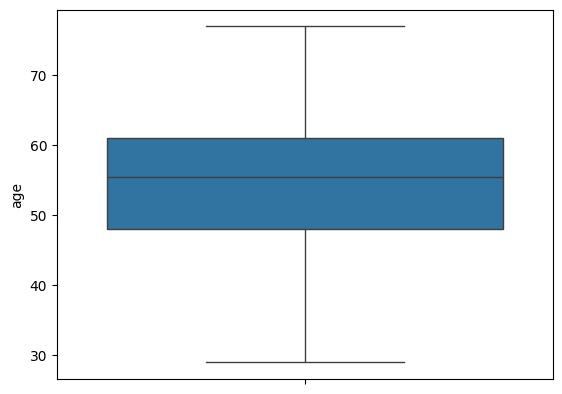

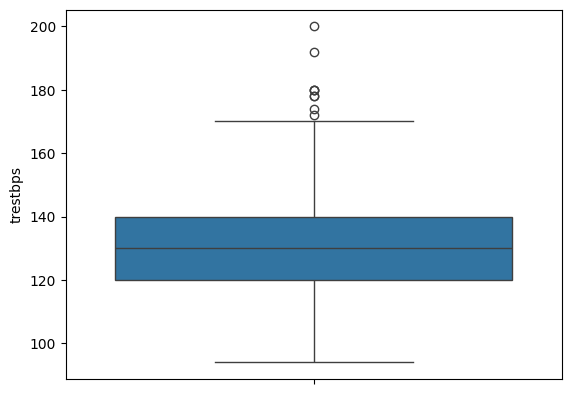

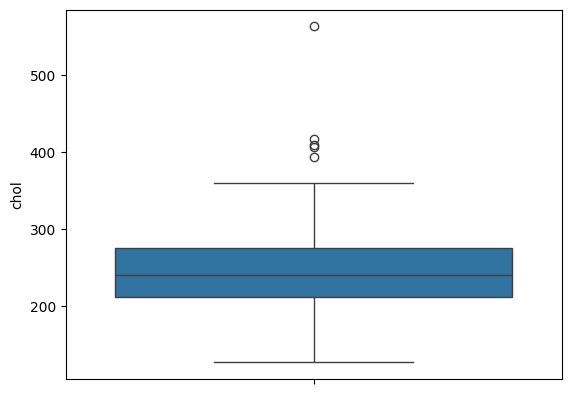

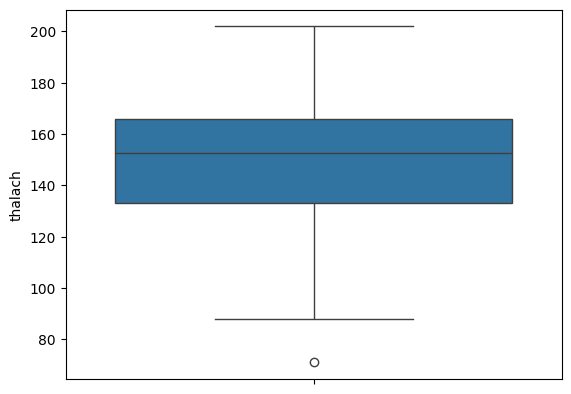

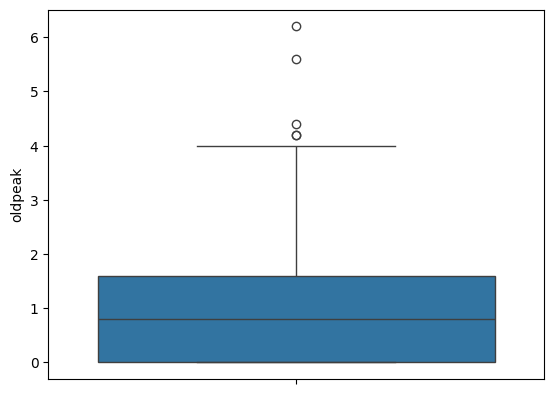

In [11]:
for i in con_var:
    sns.boxplot(df[i])
    plt.show()

In [12]:
### Outlier Treatment

def outlier(df,i):
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    IQR = q3 - q1

    upper_bound = [q3 - (1.5 * IQR)]
    lower_bound = [q1 + (1.5 * IQR)]


    for j in df.index:
        value = df.loc[j, i]
        if value < lower_bound:
            df.loc[j, i] = 0.05
        elif value > upper_bound:
            df.loc[j, i] = 0.95

    return df


for i in con_var:
    df=outlier(df,i)

# EDA 

### i) Univariate Analysis

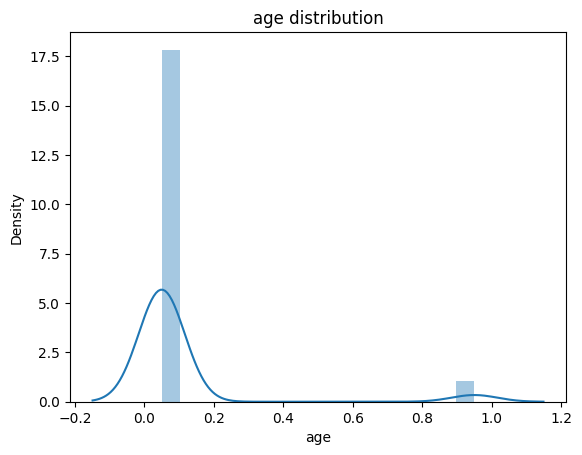

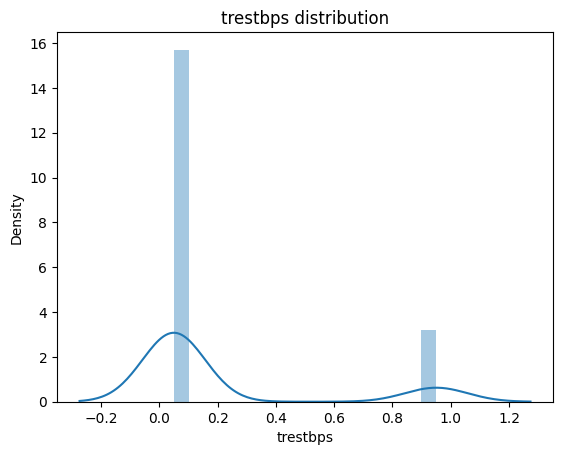

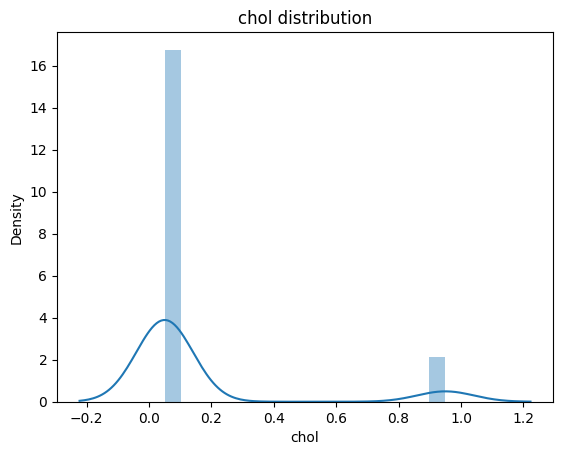

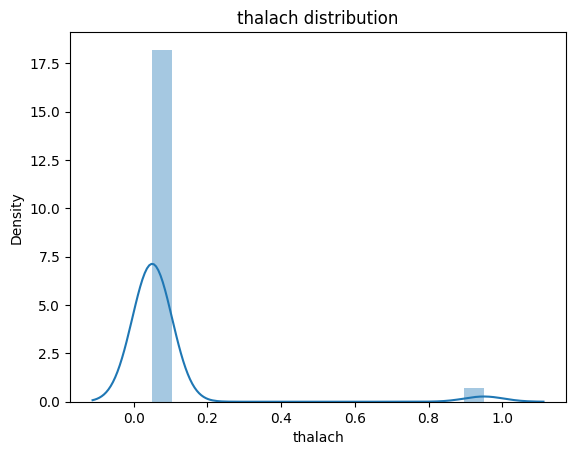

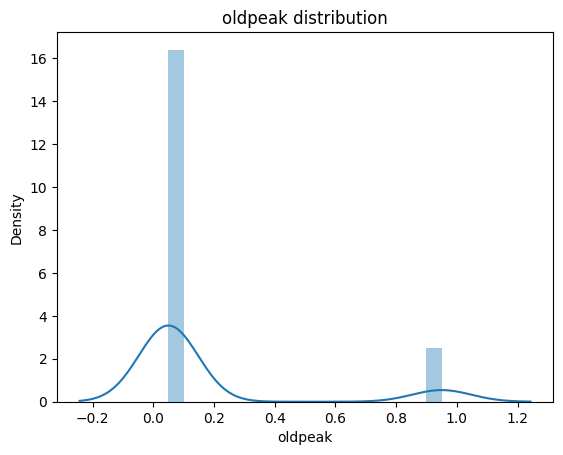

In [13]:
# continues variables
for i in con_var:
    sns.distplot(df[i])
    plt.title(f'{i} distribution')
    plt.show()

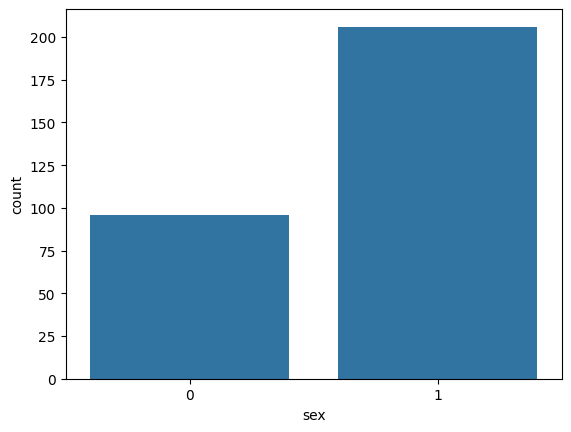

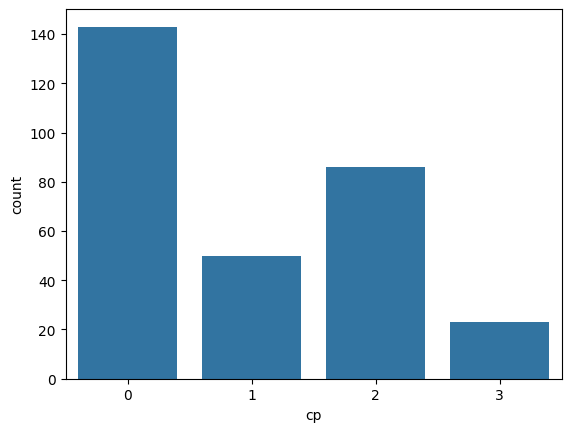

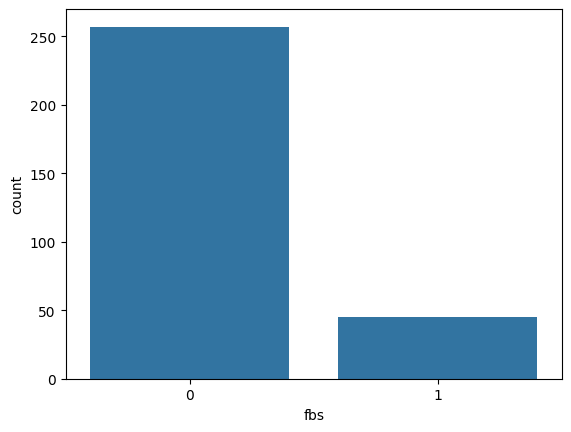

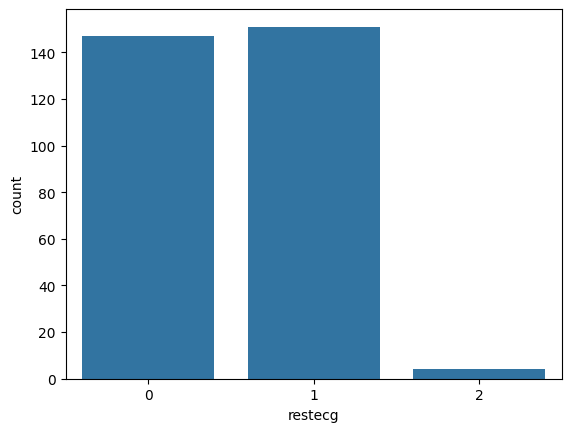

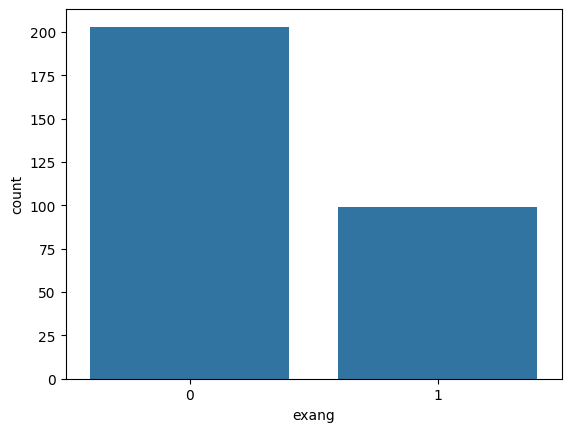

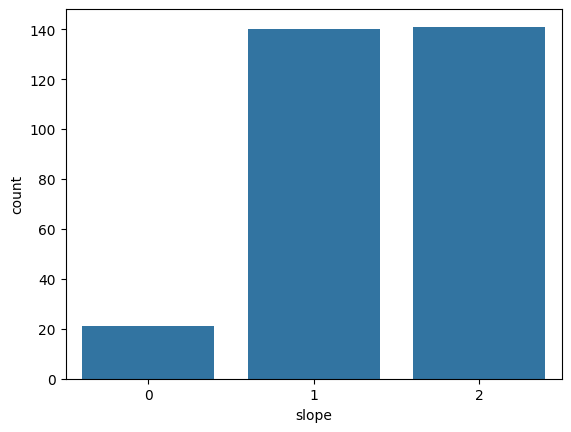

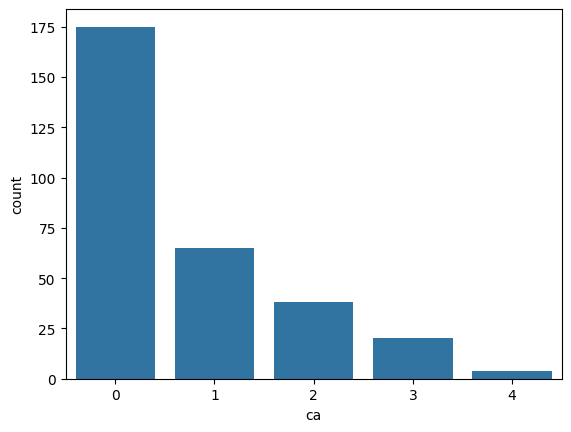

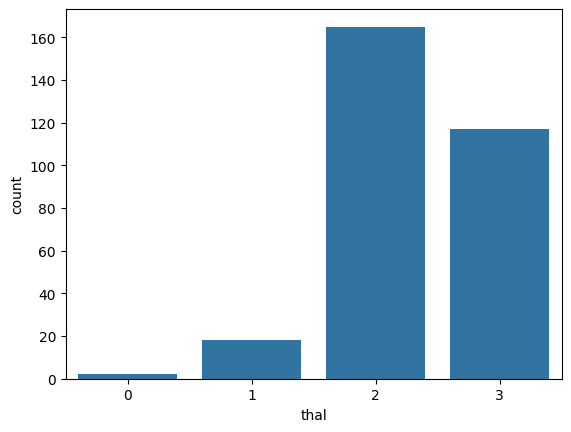

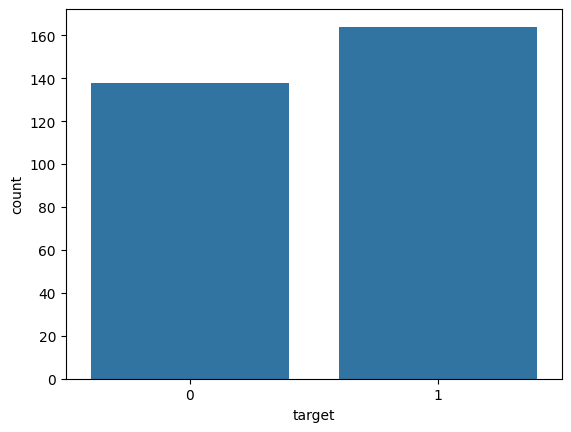

In [14]:
# categorical variable

for i in df.select_dtypes(include='object').columns:
    sns.countplot(data=df,x=df[i])
    plt.show()

### ii) Multi Variate Analysis

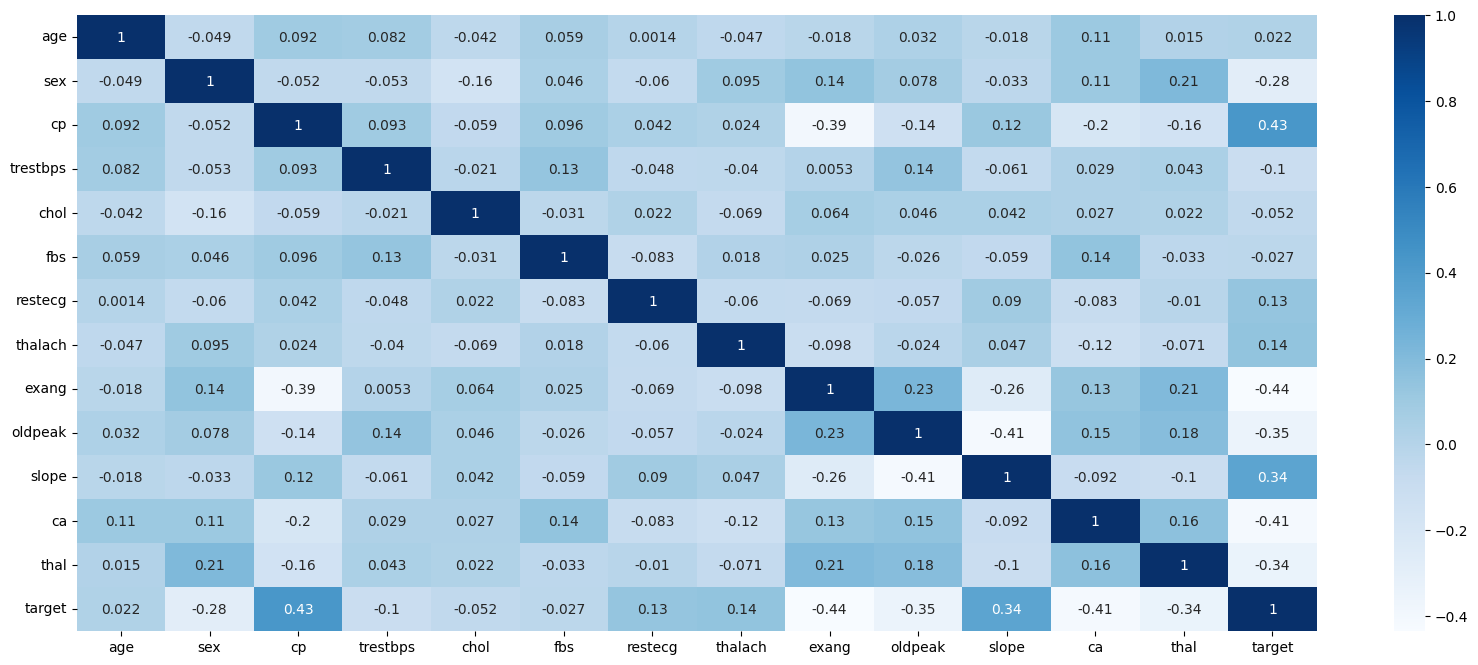

In [15]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

# Data Preprocessing

In [47]:
x = df.drop(['target'],axis=1)
y=df['target']


#### i) Feature Scaling

In [48]:
sc = StandardScaler()
x_sc=sc.fit_transform(x)

#### 2) Encoding

In [49]:
lb = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = lb.fit_transform(df[col])

# Model Selection

In [50]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size=0.25,random_state=42)

# Model Building

### i) XGBoost

In [51]:
from xgboost import XGBClassifier

# Initialize model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Fit model
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [52]:
y_pred = xgb_model.predict(x_test)
y_proba = xgb_model.predict_proba(x_test)[:, 1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("\n",classification_report(y_test, y_pred))
print('\n confusion matrix:\n',confusion_matrix(y_test,y_pred))


Accuracy: 0.8026315789473685

 ROC AUC Score: 0.8818815331010453

               precision    recall  f1-score   support

           0       0.79      0.77      0.78        35
           1       0.81      0.83      0.82        41

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76


 confusion matrix:
 [[27  8]
 [ 7 34]]


### ii) Decion Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [54]:
# Predict
y_pred1 = dt_model.predict(x_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Classification Report:")
print(classification_report(y_test, y_pred1))


Accuracy: 0.7236842105263158
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        35
           1       0.78      0.68      0.73        41

    accuracy                           0.72        76
   macro avg       0.73      0.73      0.72        76
weighted avg       0.73      0.72      0.72        76



# Model Deployement

In [55]:
joblib.dump(xgb_model,"HeartDisease.pkl")

['HeartDisease.pkl']